<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [6]:
df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


### Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [9]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [11]:
df.columns

Index(['Unnamed: 0', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

### Data Visualization

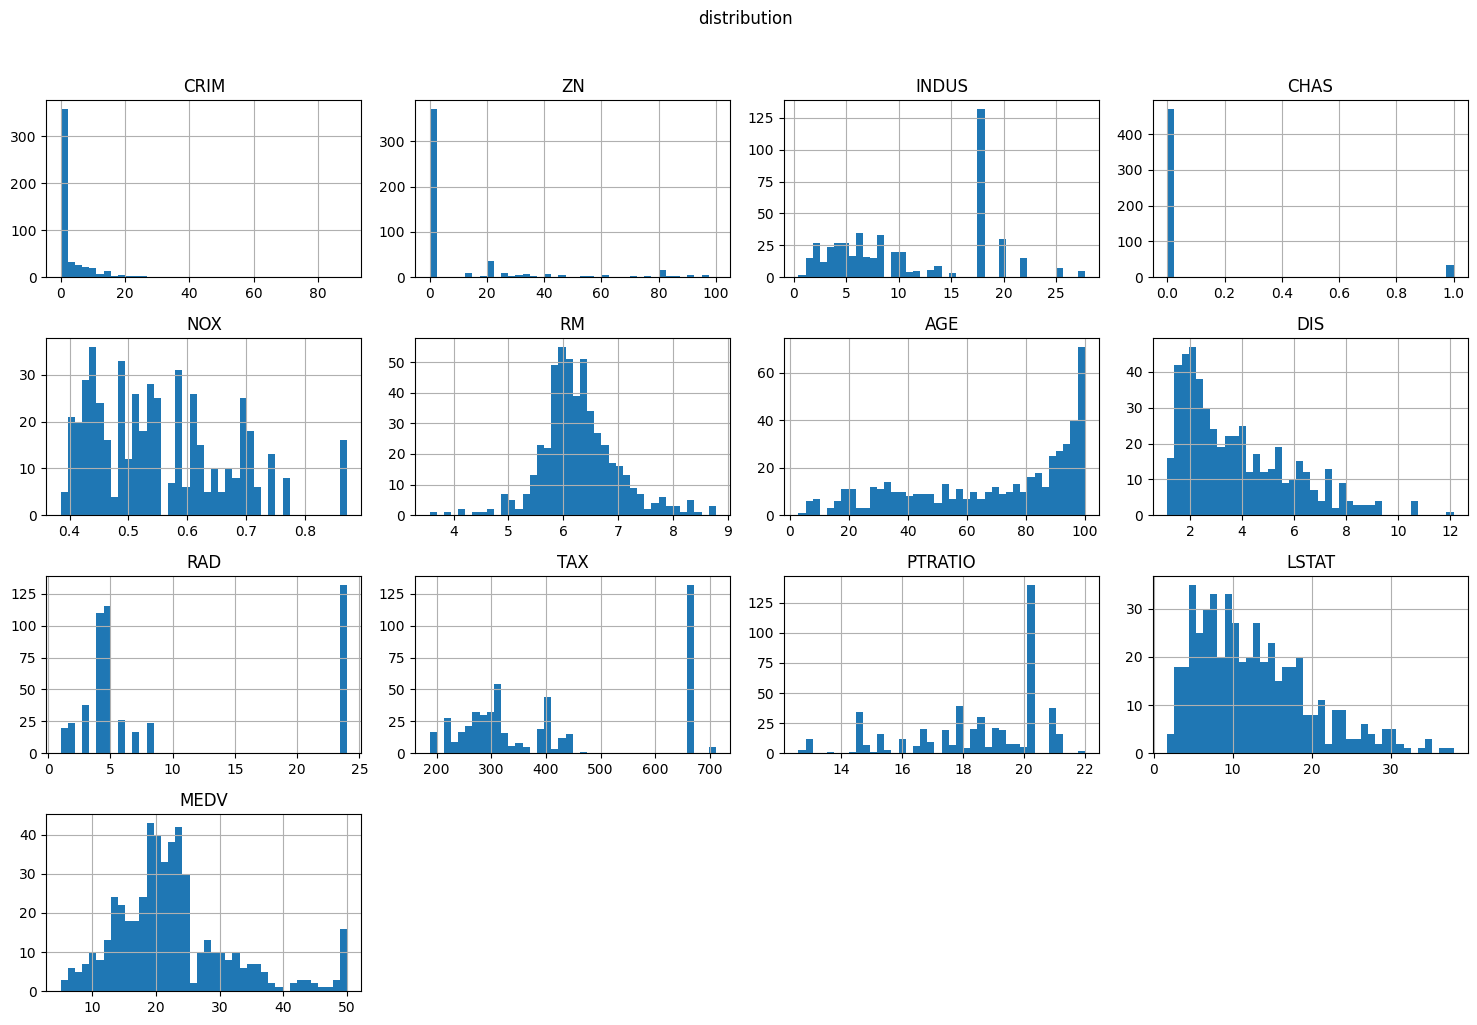

In [21]:
df2=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS',
       'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']]
df2.hist(bins=40, figsize=(15,10))
pyplot.suptitle('distribution', x=0.5, y=1.02, ha='center')
pyplot.tight_layout()
pyplot.show()

<Figure size 2000x2000 with 0 Axes>

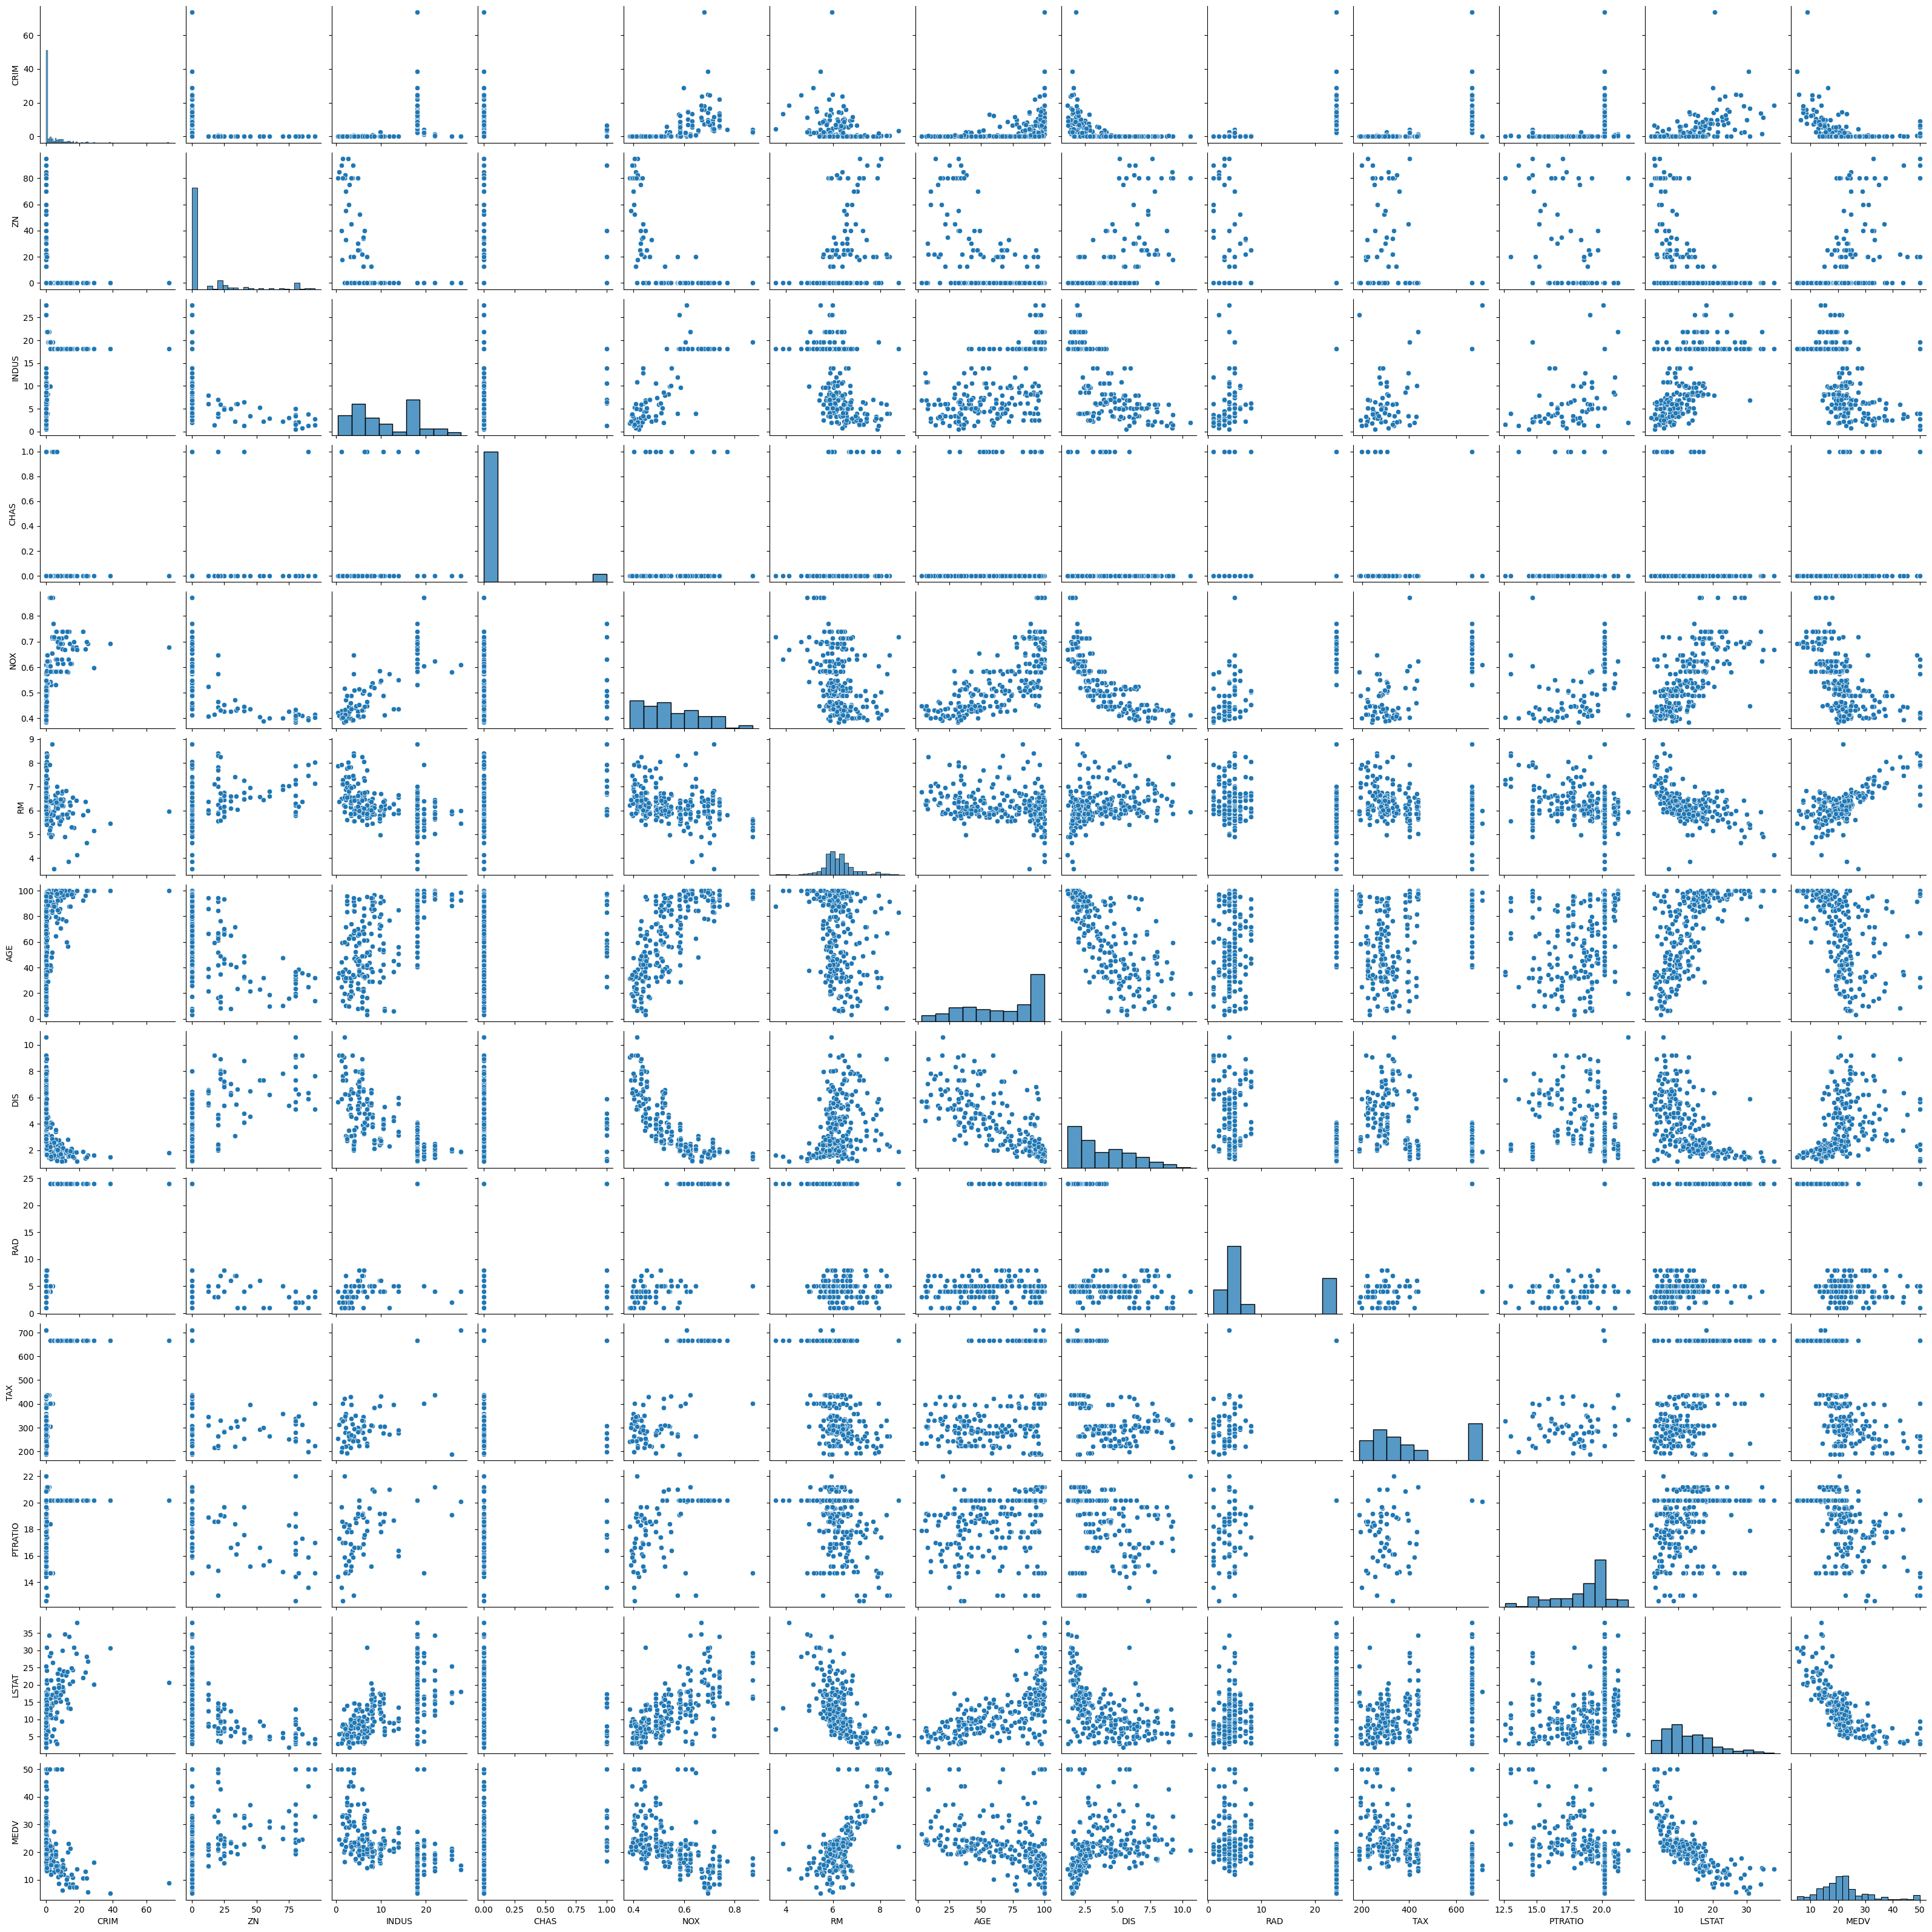

In [22]:
pyplot.figure(figsize=(20,20))
pyplot.suptitle('pairplots', x=0.5, y=1.02, fontsize='large', ha='center')
sns.pairplot(df2.sample(250))
pyplot.show()

### Task 4: Generate Descriptive Statistics and Visualizations

#### For the "Median value of owner-occupied homes" provide a boxplot

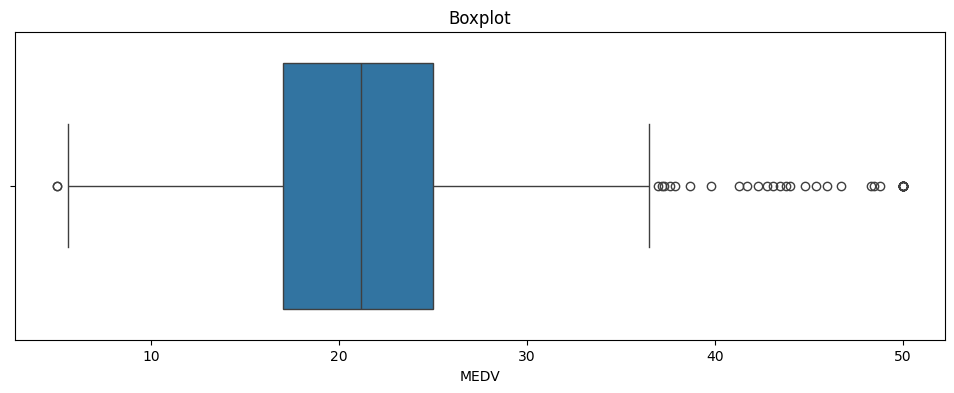

In [26]:
pyplot.figure(figsize=(12,4))
sns.boxplot(x=df2.MEDV)
pyplot.title("Boxplot")
pyplot.show()

#### Provide a  bar plot for the Charles river variable

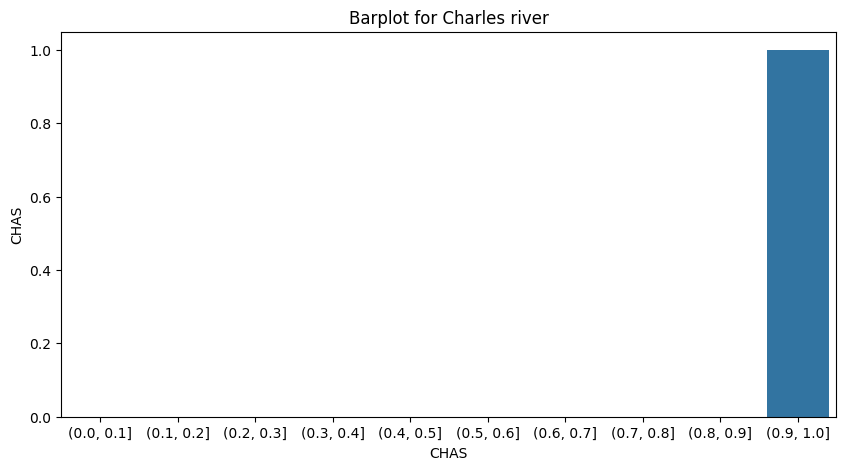

In [31]:
df_c = df2['CHAS'].groupby(pd.cut(df2['CHAS'], [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])).mean()
pyplot.figure(figsize=(10,5))
sns.barplot(data=df_c)
pyplot.title("Barplot for Charles river")
pyplot.show()

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<AxesSubplot:xlabel='MEDV', ylabel='Age_Group'>

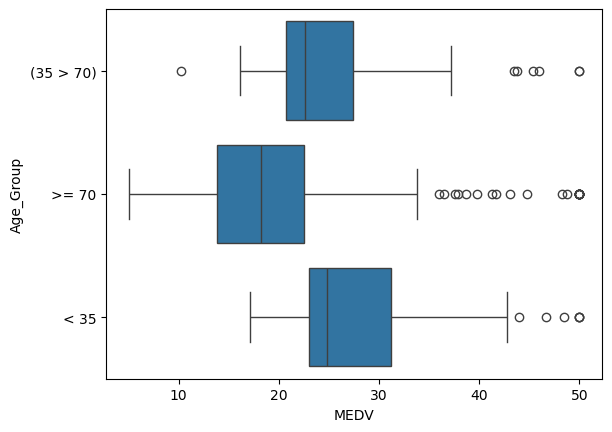

In [34]:
df2.loc[(df2['AGE'] <= 35), 'Age_Group'] = '< 35'
df2.loc[(df2['AGE'] > 35) & (df2['AGE'] < 70), 'Age_Group'] = '(35 > 70)'
df2.loc[(df2['AGE'] >= 70), 'Age_Group'] = '>= 70'

sns.boxplot(x = 'MEDV', y = 'Age_Group', data = df2)

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

<AxesSubplot:xlabel='INDUS', ylabel='NOX'>

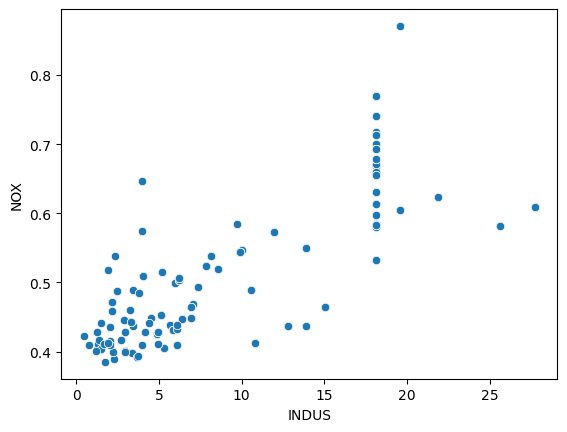

In [35]:
sns.scatterplot(y='NOX', x='INDUS', data = df2)

linear relationship for NOX > 0.6 

### Create a histogram for the pupil to teacher ratio variable

<AxesSubplot:xlabel='PTRATIO', ylabel='count'>

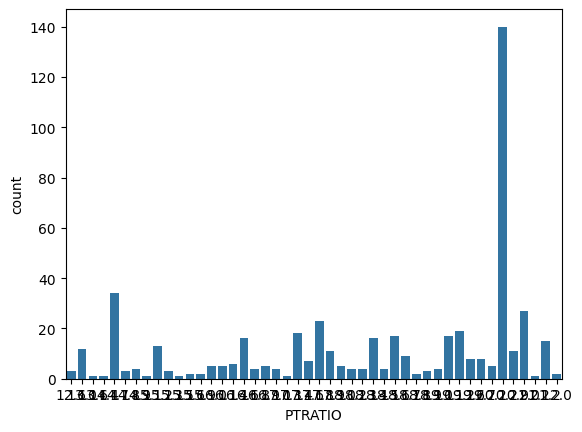

In [39]:
sns.countplot(x='PTRATIO', data=df2)

## Task 5: Use the appropriate tests to answer the questions provided.

Q: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis: 
    There is no significant difference in median value of houses bounded and not by the Charles river
Alternative Hypothesis: 
    There is a significant difference in median value of houses bounded and not by the Charles river

In [45]:
df2.loc[(df2['CHAS']==0), 'CHAS-TTEST'] = 'y'
df2.loc[(df2['CHAS']==1), 'CHAS-TTEST'] = 'n'
df2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Age_Group,CHAS_T,CHAS-TTEST
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,(35 > 70),FAR,y
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,>= 70,FAR,y
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,(35 > 70),FAR,y
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,(35 > 70),FAR,y
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,(35 > 70),FAR,y


In [46]:
scipy.stats.ttest_ind(df2[df2['CHAS-TTEST']=='y']['MEDV'], df2[df2['CHAS-TTEST']=='n']['MEDV'], equal_var=True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

p-value is less than 0.05, so Null Hypothesis is rejected. There is no a statistical difference in median for houses near (n) the Charles river 
and far (y)

Q. Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null Hypotesis: 
    There isn't difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940 (AGE)

Alternative Hypothesis: 
    There is a difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940 (AGE)

In [48]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = df2).fit()
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
AGE,1.0,6069.761065,6069.761065,83.477459,1.569982e-18
Residual,504.0,36646.534350,72.711378,NaN,NaN


p-value is less than 0.05, we fail to accept the Null Hypothesis . It means there is a difference in Median

Q. Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null Hypothesis: 
    there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

Alternative Hypothesis: 
    there is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


In [52]:
scipy.stats.pearsonr(df2['INDUS'], df2['NOX'])

PearsonRResult(statistic=0.7636514469209189, pvalue=7.913361061211254e-98)

Pearson coef is 0.76 and p-value < 0.05, Null Hypothesis is rejected

Q. What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [57]:
dis = df2['DIS']
medv = df2['MEDV']

dis = sm.add_constant(dis)
model = sm.OLS(medv, dis).fit()
predisction = model.predict(dis)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 19 Oct 2023   Prob (F-statistic):           1.21e-08
Time:                        00:06:08   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

coef DIS of 1.09 means that an extra weigthed distance to 5 empolyment centers in Boston increases of 1.09 the Median value for Owner Occupied Homes